# Explore (Exploratory Data Analysis or EDA) 

FROM LESSON

What is it?

- We explore the interactions of the attributes and target variable
- Pipeline: Plan - Acquire - Prepare - **Explore** - Model - Deliver

What do we care?

- Learn the vast majority of our takeaways and interesting stories from the data
- This section of the pipeline allows us to provide business insights
- This section determine which features to send into our model 

### Overall Process

Acquire
- pull in the data into pandas
    - get from sql (write sql query)
    - json file (use json library)
- cache the data on your local device
- look at your data! 
    - shape
    - describe 
    - data types
    - head()
    - info 
- start thinking about what the data means
    - understand what each columm means
    - what does one row mean
    - what is your target variable! 
- starting thinking relationships you want to investigate
- end with an acquire py file


Prepare
- eliminate data that is duplicated (along rows or columns)
- clean up data
    - handle null values
    - fix any incorrect values
    - verify datatypes
    - look at outliers
- at the end of the prepare phase, split your data into train, validate, and test
- end with a prepare py file

Explore
- work only with TRAIN data
- exploring features/relationship
     - find out what affects our target variable
     - find relationships between features
     - bivariate analysis (looking at 2 variables)
     - multivariabe analysis (looking at 3+ variables)
- do a lot of documentation, write conclusions

Model
- to be discussed 
- use features that we found affect our target variable and stuff them in our model


### Explore features process

1. Hypothesize
    - Write out your question about how your features interact with each other or with the target variable
    - Write this in normal language (not a statistical hypotheses)


2. Visualize
    - Plot the features in your question
    - Use the appropriate plot for your types of varibles (categorical vs continuous)


3. Analyze (with statistics)
    - Test your question with a statistical test
    - Use the appropriate statistical tests for your types of varibles (categorical vs continuous)


4. Summarize
    - Write the takeaway from your question, plot, and stats test

### Explore Guidance 
    

1. Bivariate Stats
    - two variables
    - plot the interactions of two variables


2. Multivariate Stats 
    - more than 2 variables
    - use color or columns to represent a third variable
    - ensure the plot selected is appropriate for the other variables


4. Statistical Tests
    - continuous to continuous: correlation
    - categorical to categorical: chi^2 
    - continuous to categorical: comparing means test

## Continue with the Titanic Dataset

In [1]:
#data manipulations
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats

#my own files with my own functions
import acquire
import prepare

## Acquire

In [2]:
#get the data using my function in my acquire file
df = acquire.get_titanic_data()

this file exists, reading csv


In [3]:
#look at it
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [5]:
df.shape

(891, 13)

In [6]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### Univariate Stats

In [7]:
df.nunique()

passenger_id    891
survived          2
pclass            3
sex               2
age              88
sibsp             7
parch             7
fare            248
embarked          3
class             3
deck              7
embark_town       3
alone             2
dtype: int64

In [8]:
#intializing empty lists
cat_col = []
con_col = []

#looping through all my columns
for col in df.columns:
    
    #finding all my string columns
    print(col)
    print(df[col].dtype)
    if df[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values
        print(df[col].nunique())
        if df[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else: 
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
    print()

passenger_id
int64
this is a number
891

survived
int64
this is a number
2
treat as categorical variable

pclass
int64
this is a number
3
treat as categorical variable

sex
object
this is a string variable

age
float64
this is a number
88

sibsp
int64
this is a number
7
treat as categorical variable

parch
int64
this is a number
7
treat as categorical variable

fare
float64
this is a number
248

embarked
object
this is a string variable

class
object
this is a string variable

deck
object
this is a string variable

embark_town
object
this is a string variable

alone
int64
this is a number
2
treat as categorical variable



In [9]:
cat_col

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'deck',
 'embark_town',
 'alone']

In [10]:
con_col

['passenger_id', 'age', 'fare']

#### categorical variables
- value_counts
- bar plots

survived
0    549
1    342
Name: survived, dtype: int64
0    0.616162
1    0.383838
Name: survived, dtype: float64
Axes(0.125,0.11;0.775x0.77)


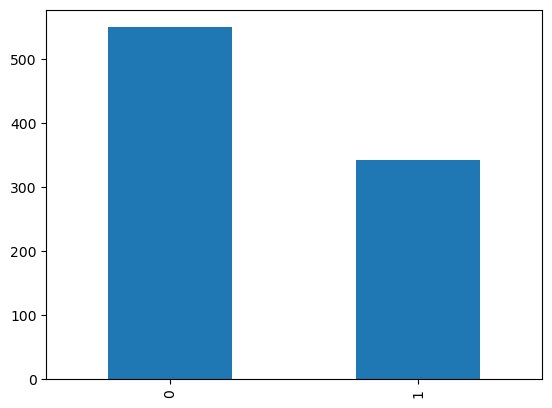


pclass
3    491
1    216
2    184
Name: pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64
Axes(0.125,0.11;0.775x0.77)


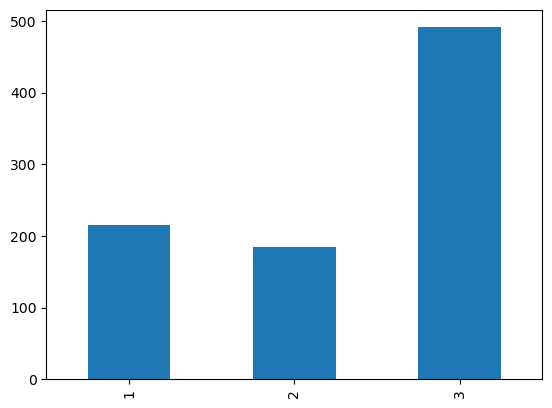


sex
male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64
Axes(0.125,0.11;0.775x0.77)


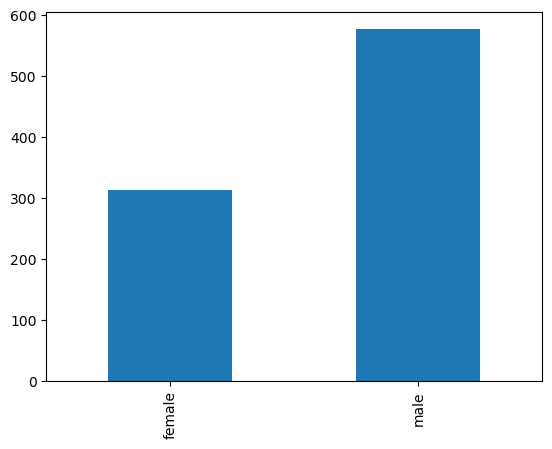


sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64
Axes(0.125,0.11;0.775x0.77)


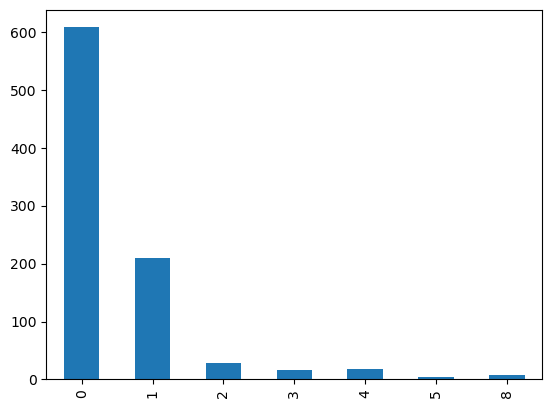


parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64
Axes(0.125,0.11;0.775x0.77)


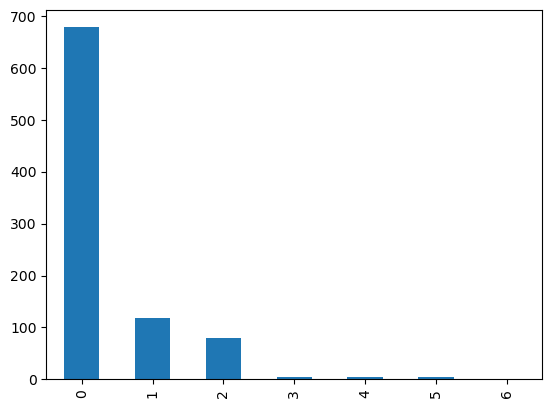


embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64
Axes(0.125,0.11;0.775x0.77)


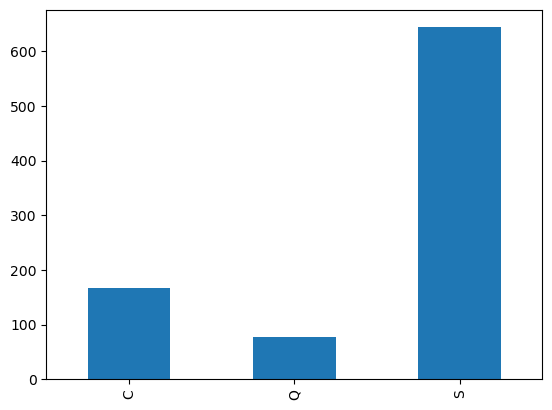


class
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
Axes(0.125,0.11;0.775x0.77)


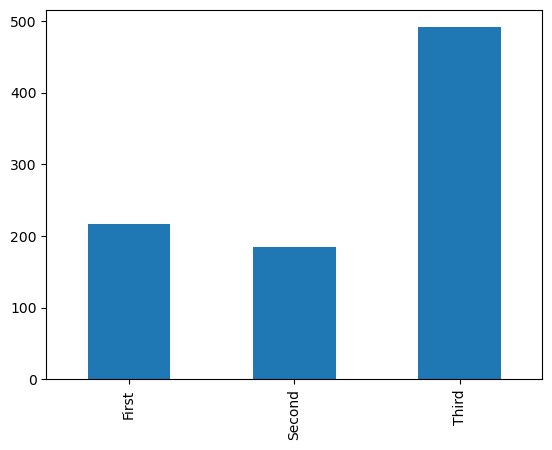


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64
Axes(0.125,0.11;0.775x0.77)


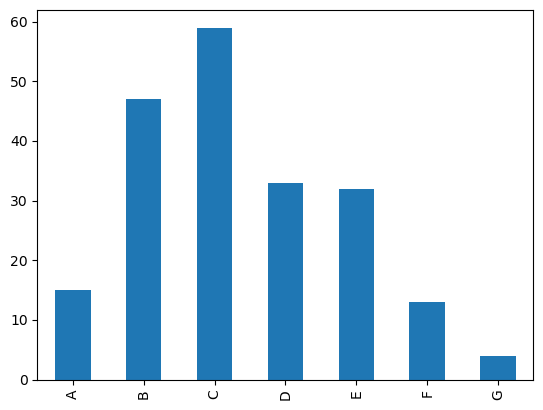


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64
Axes(0.125,0.11;0.775x0.77)


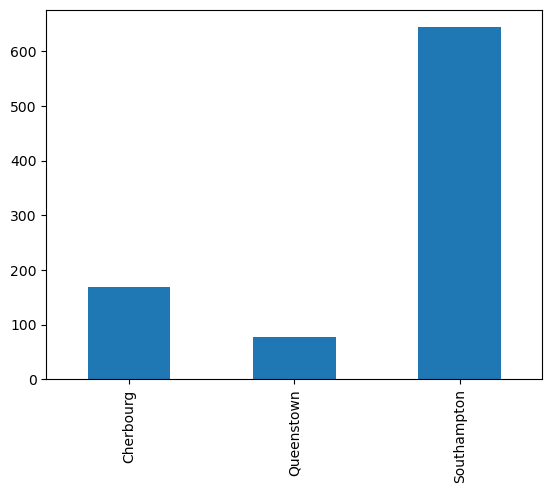


alone
1    537
0    354
Name: alone, dtype: int64
1    0.602694
0    0.397306
Name: alone, dtype: float64
Axes(0.125,0.11;0.775x0.77)


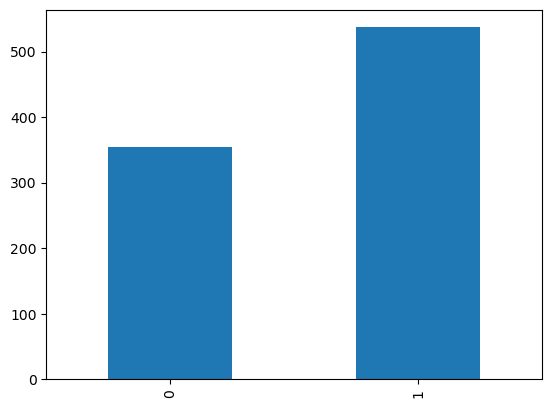

In [11]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print(df[col].value_counts().sort_index().plot.bar())
    plt.show()
    print()

#### numeric variables
- value_counts with bins
- histogram

passenger_id
(-0.891, 89.0]    90
(89.0, 178.0]     89
(178.0, 267.0]    89
(267.0, 356.0]    89
(356.0, 445.0]    89
(445.0, 534.0]    89
(534.0, 623.0]    89
(623.0, 712.0]    89
(712.0, 801.0]    89
(801.0, 890.0]    89
Name: passenger_id, dtype: int64


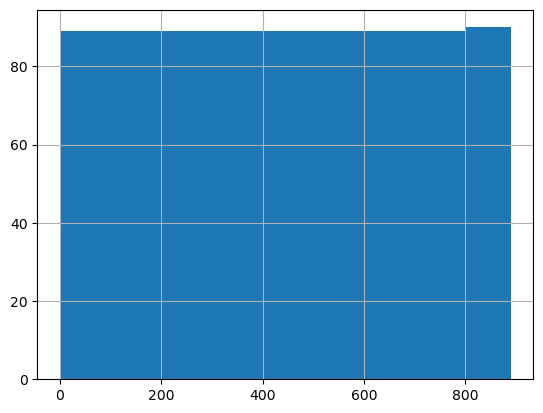

age
(0.339, 8.378]       54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    169
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: age, dtype: int64


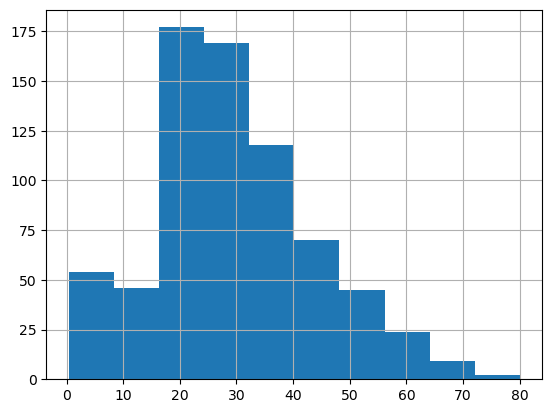

fare
(-0.513, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
Name: fare, dtype: int64


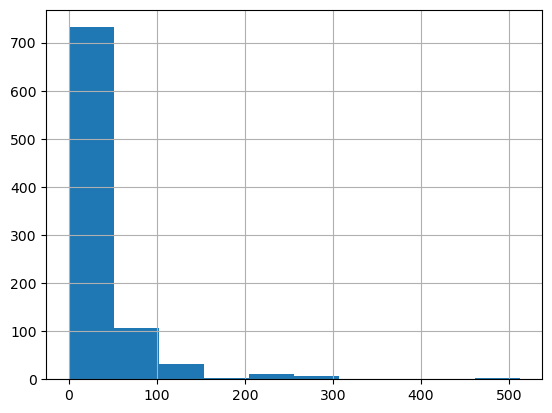

In [12]:
for col in con_col:
    print(col)
    print(df[col].value_counts(bins=10).sort_index())
    df[col].hist()
    plt.show()

## Prepare

In [13]:
#clean and split my data using my function in my prepare file
df = prepare.clean_titanic(df)

In [14]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [16]:
train, validate, test = prepare.splitting_data(df, 'survived')

In [17]:
train.shape

(534, 9)

In [18]:
validate.shape

(178, 9)

In [19]:
test.shape

(179, 9)

In [20]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
776,776,0,3,male,0,0,7.7500,Queenstown,1
829,829,1,1,female,0,0,80.0000,Southampton,1
215,215,1,1,female,1,0,113.2750,Cherbourg,0
258,258,1,1,female,0,0,512.3292,Cherbourg,1
129,129,0,3,male,0,0,6.9750,Southampton,1


## Explore

<div class="alert alert-block alert-info">
    <h1>ONLY USE TRAIN DATASET WHEN YOU GET TO EXPLORE</h1>    
 
- we will no longer use the df dataset
- we will save the validate and test dataset for modeling
    
</div>

### Bivariate Stats

follow the process
    
1. Hypothesize
2. Visualize 
3. Analyze (with stats)
4. Summarize

In [21]:
#only use train
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
776,776,0,3,male,0,0,7.7500,Queenstown,1
829,829,1,1,female,0,0,80.0000,Southampton,1
215,215,1,1,female,1,0,113.2750,Cherbourg,0
258,258,1,1,female,0,0,512.3292,Cherbourg,1
129,129,0,3,male,0,0,6.9750,Southampton,1


#### 1. Hypothesize

Q: Does the passenger class affect whether or not someone survived? 

In [22]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [23]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

#### 2. Visualize


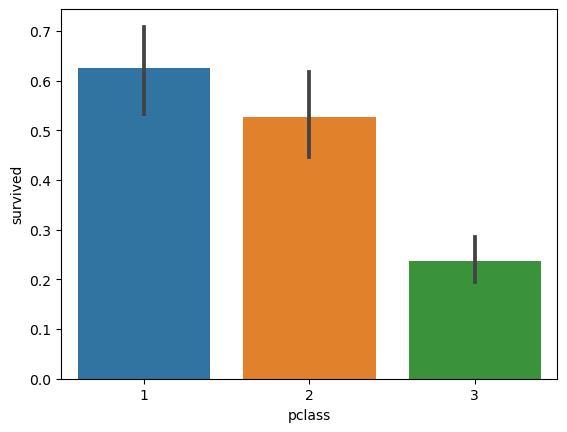

In [26]:
sns.barplot(data=train, y='survived', x='pclass');

> We can see that people in higher classes have a higher survival rate. 

#### 3. Analyze (with stats)

In [31]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [32]:
train.pclass.value_counts()

3    304
1    120
2    110
Name: pclass, dtype: int64

$H_o$: There is NO relationship between pclass and survived

$H_a$: There IS relationship between pclass and survived

alpha = 0.05

In [34]:
observed = pd.crosstab(train.survived, train.pclass)
observed

pclass,1,2,3
survived,,,
0,45,52,232
1,75,58,72


In [36]:
#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [37]:
p

3.048359848441437e-15

My p-value is less than alpha, therefore, we reject the null hypothesis. 

we can conclude that there is a relationship between pclass and survived. 

#### 4. Summarize

We confirmed there is a relationship between pclass and survived, and that as people have a higher class, they are more likely to survived. 

### Repeat

In [39]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
776,776,0,3,male,0,0,7.7500,Queenstown,1
829,829,1,1,female,0,0,80.0000,Southampton,1
215,215,1,1,female,1,0,113.2750,Cherbourg,0
258,258,1,1,female,0,0,512.3292,Cherbourg,1
129,129,0,3,male,0,0,6.9750,Southampton,1


#### 1. Hypothesize

Q: does fare incidate whether or not someone survived? 

what type of variables am i comparing?
- survived is categorical
- fare is continuous

#### 2. Visualize

what kind of plot can i use? 
- box plot
- violin plot
- swarmplot
- strip plot

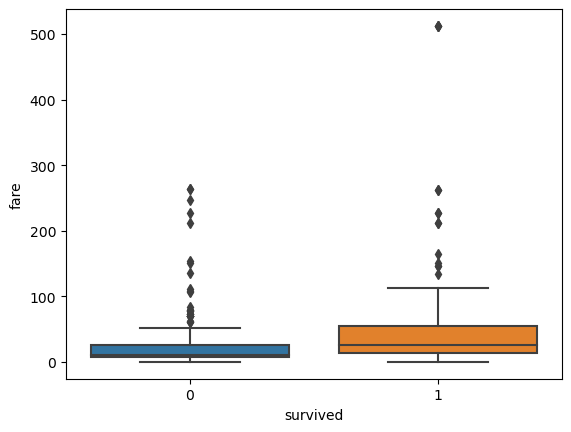

In [42]:
sns.boxplot(data=train, x='survived', y='fare')
plt.show()

> it does look like people who paid more money for their ticket, were more likely to survive

#### 3. Analyze (with statistics)

what type of test should i use for this?

- comparing means
- if we assume normality, do a ttest
- since we are comparing two subgroups (survived to nonsurvived), 2-sample ttest
- since we are checking for any difference, 2-tail

$H_0$: there is no relationship between survived and fare

$H_a$: there is a relationship between survived and fare

alpha = 0.05

In [52]:
#make two arrays of peoples fare

#all the fares for people that survived
survived = train [train.survived == 1].fare

#all the fares for people that didnt survive
perished = train [train.survived == 0].fare

> We need to verify normality and check for equal variances!! 

In [54]:
survived.head()

829     80.0000
215    113.2750
258    512.3292
710     49.5042
506     26.0000
Name: fare, dtype: float64

In [56]:
t, pval = stats.ttest_ind(survived, perished)

In [57]:
pval

2.59647296963686e-07

Our pvalue is less than alpha, therefore, we reject the null hypothesis. 

There is a relationship between fare and survived.

#### 4. Summarize

When people paid more for their fare, they had higher chances of survival.

In [59]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
776,776,0,3,male,0,0,7.7500,Queenstown,1
829,829,1,1,female,0,0,80.0000,Southampton,1
215,215,1,1,female,1,0,113.2750,Cherbourg,0
258,258,1,1,female,0,0,512.3292,Cherbourg,1
129,129,0,3,male,0,0,6.9750,Southampton,1


### Multivariate Stats
-USE TRAIN DATASET ONLY-

- can ask more targeted questions, like subgroup vs subgroup vs category
- multivariate statistical tests exist, but are outside the scope of this course.

1. Hypothesize
2. Visualize
3. ~Analyze (with statistics)~
4. Summarize


In [60]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
776,776,0,3,male,0,0,7.7500,Queenstown,1
829,829,1,1,female,0,0,80.0000,Southampton,1
215,215,1,1,female,1,0,113.2750,Cherbourg,0
258,258,1,1,female,0,0,512.3292,Cherbourg,1
129,129,0,3,male,0,0,6.9750,Southampton,1


#### 1. Hypothesize

Q: do males have a greater chance of survival when traveling alone?

- sex, categorical variable
- survived, categorical variable
- alone, categorical variable

#### 2. Visualize

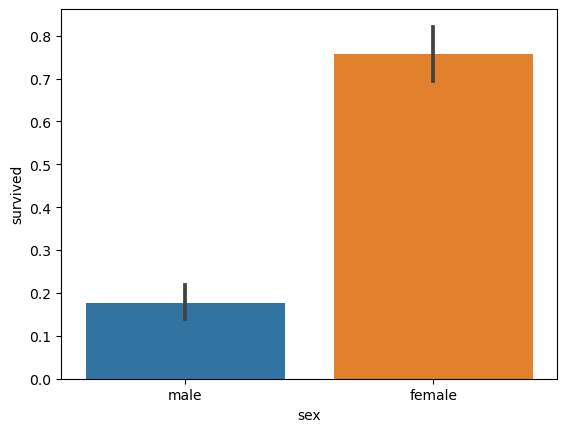

In [62]:
#just two variables
sns.barplot(data=train, x='sex', y='survived');

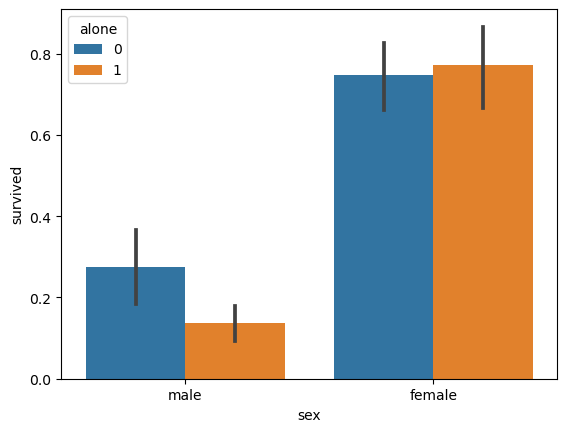

In [63]:
#using hue to show the third variable
sns.barplot(data=train, x='sex', y='survived', hue='alone');

#### 3. Summarize

Males overall had a lower chance of survival, compared to females. However, if the male was travleing alone, they have a lower survived rate than traveleing with someone.

## Explore Conclusions
note: this is a summary of all of our takeaways in the explore section

We saw there was a relationship between passenger class, fare, and gender and whether or not they survived. 

To increase someone's chances of surviving they needed a higher class, a higher fare, and needed to be female, or a male traveling with someone.

### Final notes on exploring

How much time do you think it will take to explore all of your features and how they relate to your target variable? 
- a lot of time

Therefore, you have to PRIORITIZE the features you want to compare
- use your domain knowledge
- you can also rotate your relationships with a for loop (at the beginning of explore)
    - maybe look at a pairplot


### With more time, reiterate
As you have more time, you can reiterate and go back through and investigate more features. 

Recall how we dropped the age column completetly since 20% of the values were missing? 
- add back that column 
    - maybe drop all the rows with nulls instead
    - maybe try to replace those null values with some other value, maybe by group?
- investigate how age affects survival now

### Make sure you're documenting takeaways throughout your exploration! 